In [1]:
#importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Checking the Data Dictionary

In [40]:
set(df["age"])
#looking at the output we came to know it is quantitative Discrete data

{29,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 74,
 76,
 77}

In [16]:
set(df["cp"])
#looking at the output we came to know it is quantitative Discrete data

{0, 1, 2, 3}

In [18]:
set(df["trestbps"])
#looking at the output we came to know it is quantitative Discrete data

{94,
 100,
 101,
 102,
 104,
 105,
 106,
 108,
 110,
 112,
 114,
 115,
 117,
 118,
 120,
 122,
 123,
 124,
 125,
 126,
 128,
 129,
 130,
 132,
 134,
 135,
 136,
 138,
 140,
 142,
 144,
 145,
 146,
 148,
 150,
 152,
 154,
 155,
 156,
 160,
 164,
 165,
 170,
 172,
 174,
 178,
 180,
 192,
 200}

In [24]:
set(df["restecg"])
#looking at the output we came to know it is quantitative Discrete data

{0, 1, 2}

In [26]:
set(df["thalach"])
#looking at the output we came to know it is quantitative Discrete data

{71,
 88,
 90,
 95,
 96,
 97,
 99,
 103,
 105,
 106,
 108,
 109,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 177,
 178,
 179,
 180,
 181,
 182,
 184,
 185,
 186,
 187,
 188,
 190,
 192,
 194,
 195,
 202}

In [28]:
set(df["oldpeak"])
#looking at the output we came to know it is quantitative continous data

{0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.4,
 3.5,
 3.6,
 3.8,
 4.0,
 4.2,
 4.4,
 5.6,
 6.2}

In [30]:
set(df["slope"])
#looking at the output we came to know it is quantitative Discrete data

{0, 1, 2}

In [32]:
set(df["ca"])
#looking at the output we came to know it is quantitative Discrete data

{0, 1, 2, 3, 4}

In [34]:
set(df["thal"])
#looking at the output we came to know it is quantitative Discrete data

{0, 1, 2, 3}

In [36]:
set(df["target"])
#looking at the output we came to know it is quantitative Discrete data

{0, 1}

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

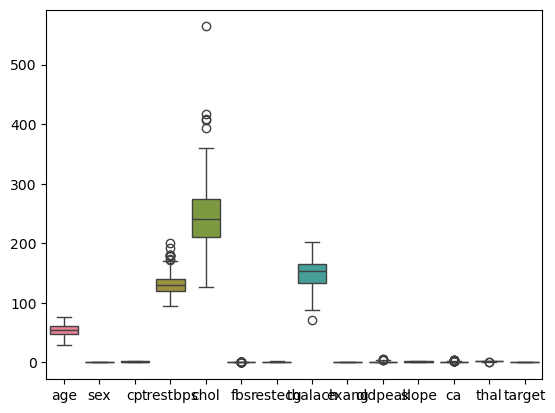

In [86]:
#Feature Engineering 
#Detectting the outliers
sns.boxplot(df)

<Axes: ylabel='trestbps'>

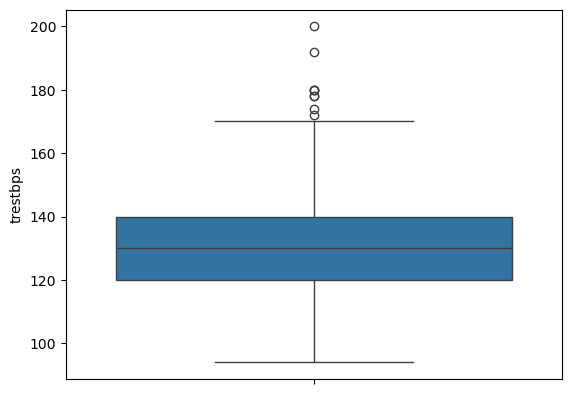

In [88]:
sns.boxplot(df["trestbps"])
#Looking at the output we can see there are outliers

<Axes: ylabel='chol'>

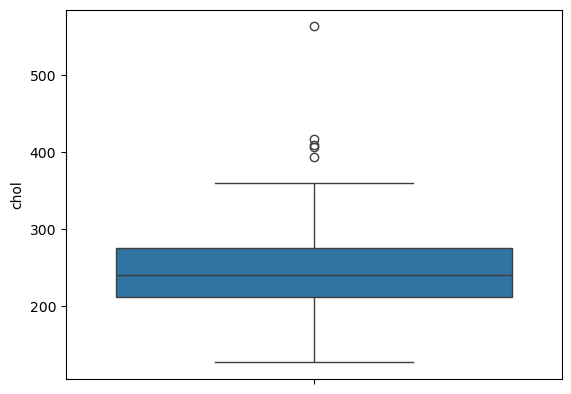

In [90]:
sns.boxplot(df["chol"])
#Looking at the output we can see there are outliers

<Axes: ylabel='oldpeak'>

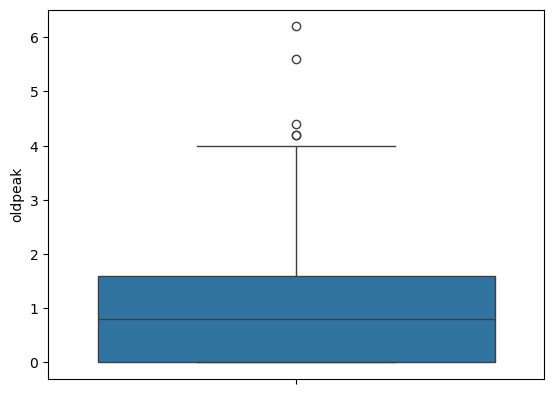

In [92]:
sns.boxplot(df["oldpeak"])
#Looking at the output we can see there are outliers

In [5]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Detecting outliers in multiple columns
outliers = detect_outliers_iqr(df)

# Remove rows where any column has an outlier
df_cleaned = df[~outliers.any(axis=1)]

<Axes: >

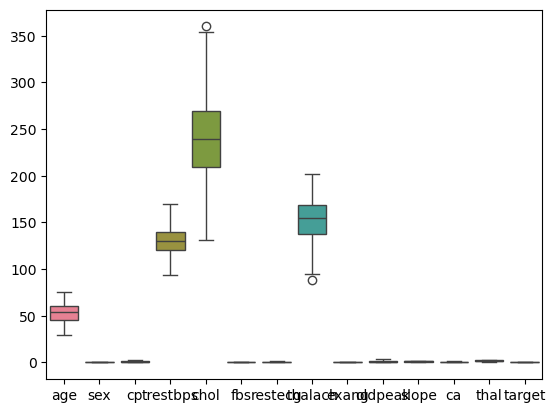

In [7]:
sns.boxplot(df_cleaned)

In [9]:
#Now we will go for EDA

In [11]:
df_cleaned.shape

(228, 14)

In [11]:
#first we will check summary of data
df_cleaned.describe()   

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


In [13]:
df_cleaned.info()  #from info() weget all the information regarding to the data

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       228 non-null    int64  
 1   sex       228 non-null    int64  
 2   cp        228 non-null    int64  
 3   trestbps  228 non-null    int64  
 4   chol      228 non-null    int64  
 5   fbs       228 non-null    int64  
 6   restecg   228 non-null    int64  
 7   thalach   228 non-null    int64  
 8   exang     228 non-null    int64  
 9   oldpeak   228 non-null    float64
 10  slope     228 non-null    int64  
 11  ca        228 non-null    int64  
 12  thal      228 non-null    int64  
 13  target    228 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 26.7 KB


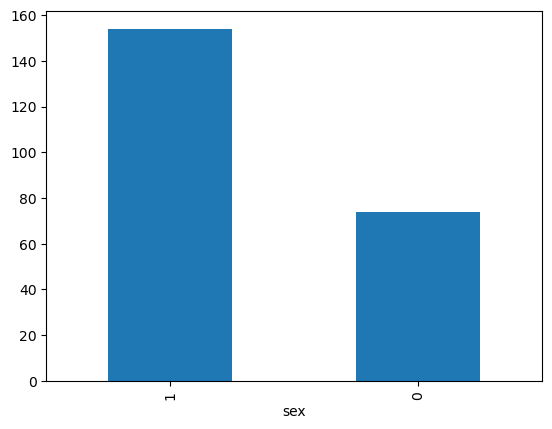

In [26]:
#Now Univariete Analysis
#for sex
df_cleaned['sex'].value_counts().plot(kind='bar')
plt.show()

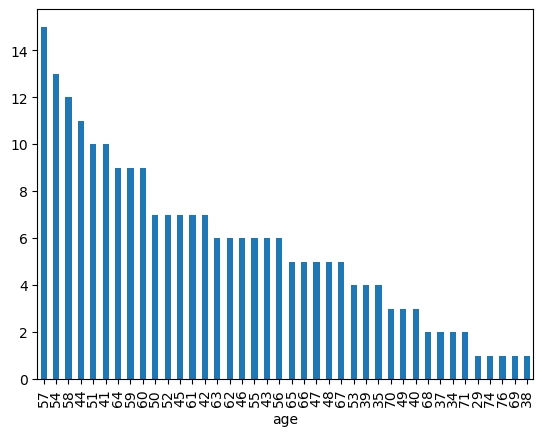

In [28]:
#for sex
df_cleaned['age'].value_counts().plot(kind='bar')
plt.show()

In [33]:
#Now we will go for PCA without clustering 

In [41]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [18]:
#now scaling the data 
df_scaled=scale(df_cleaned)
df_scaled

array([[-1.77367443,  0.69319512,  1.03837841, ..., -0.68550748,
        -0.56484923,  0.85280287],
       [-1.33930518, -1.44259526,  0.05601211, ..., -0.68550748,
        -0.56484923,  0.85280287],
       [ 0.2895795 ,  0.69319512,  0.05601211, ..., -0.68550748,
        -0.56484923,  0.85280287],
       ...,
       [-0.90493593,  0.69319512,  2.0207447 , ..., -0.68550748,
         1.22384   , -1.17260394],
       [ 0.39817181,  0.69319512, -0.92635418, ...,  0.74839807,
         1.22384   , -1.17260394],
       [ 0.39817181, -1.44259526,  0.05601211, ...,  0.74839807,
        -0.56484923, -1.17260394]])

In [20]:
#Now applying PCA
pca=PCA(n_components=14)
pca_vlaues=pca.fit_transform(df_scaled)
var=pca.explained_variance_ratio_
var

array([2.65396697e-01, 1.14047734e-01, 9.77679694e-02, 8.59329465e-02,
       7.75443245e-02, 6.81501048e-02, 6.13740083e-02, 5.23600288e-02,
       4.86129157e-02, 4.33320744e-02, 3.26663157e-02, 2.85300155e-02,
       2.42848655e-02, 8.50271613e-18])

In [22]:
#To check the cumulative variance
varl=np.cumsum(np.round(var,decimals=4)*100)
varl

array([ 26.54,  37.94,  47.72,  56.31,  64.06,  70.88,  77.02,  82.26,
        87.12,  91.45,  94.72,  97.57, 100.  , 100.  ])

In [24]:
#Now we apply after Clustering so we will do clustering first


In [9]:
from sklearn.cluster import AgglomerativeClustering
h=AgglomerativeClustering(n_clusters=4,linkage="complete",metric="euclidean").fit(df_cleaned)
h.labels_
complete_label=pd.Series(h.labels_)
df_cleaned["Clust"]=complete_label
df_cleaned.head()



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6632\2098514893.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Clust"]=complete_label


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Clust
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,3.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1.0
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,0.0


In [11]:
df_cleaned.drop('fbs', axis=1, inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6632\1844591467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('fbs', axis=1, inplace=True)


In [25]:
df_cut=df_cleaned.iloc[:229]

In [35]:
df_cut.head()


,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Clust
1,37,1,2,130,250,1,187,0,3.5,0,0,2,1,3.0
2,41,0,1,130,204,0,172,0,1.4,2,0,2,1,3.0
3,56,1,1,120,236,1,178,0,0.8,2,0,2,1,2.0
4,57,0,0,120,354,1,163,1,0.6,2,0,2,1,1.0
5,57,1,0,140,192,1,148,0,0.4,1,0,1,1,0.0


In [43]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, 1 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       227 non-null    int64  
 1   sex       227 non-null    int64  
 2   cp        227 non-null    int64  
 3   trestbps  227 non-null    int64  
 4   chol      227 non-null    int64  
 5   restecg   227 non-null    int64  
 6   thalach   227 non-null    int64  
 7   exang     227 non-null    int64  
 8   oldpeak   227 non-null    float64
 9   slope     227 non-null    int64  
 10  ca        227 non-null    int64  
 11  thal      227 non-null    int64  
 12  target    227 non-null    int64  
 13  Clust     177 non-null    float64
dtypes: float64(2), int64(12)
memory usage: 26.6 KB


age          0
sex          0
cp           0
trestbps     0
chol         0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
Clust       51
dtype: int64

In [146]:
df_cleaned['Clust'].value_counts()

Clust
3.0    70
0.0    70
1.0    30
2.0     7
Name: count, dtype: int64

In [45]:
#Now caling the data
df_scaled_c=scale(df_cut)
df_scaled_c

array([[-1.76864804,  0.68849544,  1.03635213, ..., -0.56649027,
         0.84834956,  1.15758822],
       [-1.33508097, -1.45244244,  0.05613574, ..., -0.56649027,
         0.84834956,  1.15758822],
       [ 0.29079553,  0.68849544,  0.05613574, ..., -0.56649027,
         0.84834956,  0.41790188],
       ...,
       [ 0.3991873 , -1.45244244, -0.92408065, ...,  1.21952767,
        -1.17875938,         nan],
       [-0.9015139 ,  0.68849544,  2.01656851, ...,  1.21952767,
        -1.17875938,         nan],
       [ 0.3991873 ,  0.68849544, -0.92408065, ...,  1.21952767,
        -1.17875938,         nan]])

In [70]:
#Now applysing PCA on Clustered Dataset

In [51]:
#Now applying PCA
pca_c=PCA(n_components=10)
pca_c_values=pca_c.fit_transform(df_cleaned)
var=pca.expalined_variance_ratio
var


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values